Kannada MNIST - Classification Problem

In [1]:
#Importing neccessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,precision_score, f1_score, recall_score, roc_auc_score,confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

In [2]:
#Converting dataset into Pandas Dataframe
df=pd.read_csv(r"C:\Users\banup\Desktop\nlp_guvi_project\Project 1  Kannada MNIST - Classification Problem\train.csv\train.csv")

#Splitting features(X) and Labels(y)
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [3]:
#Splitting dataset for training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=10000,random_state=100)

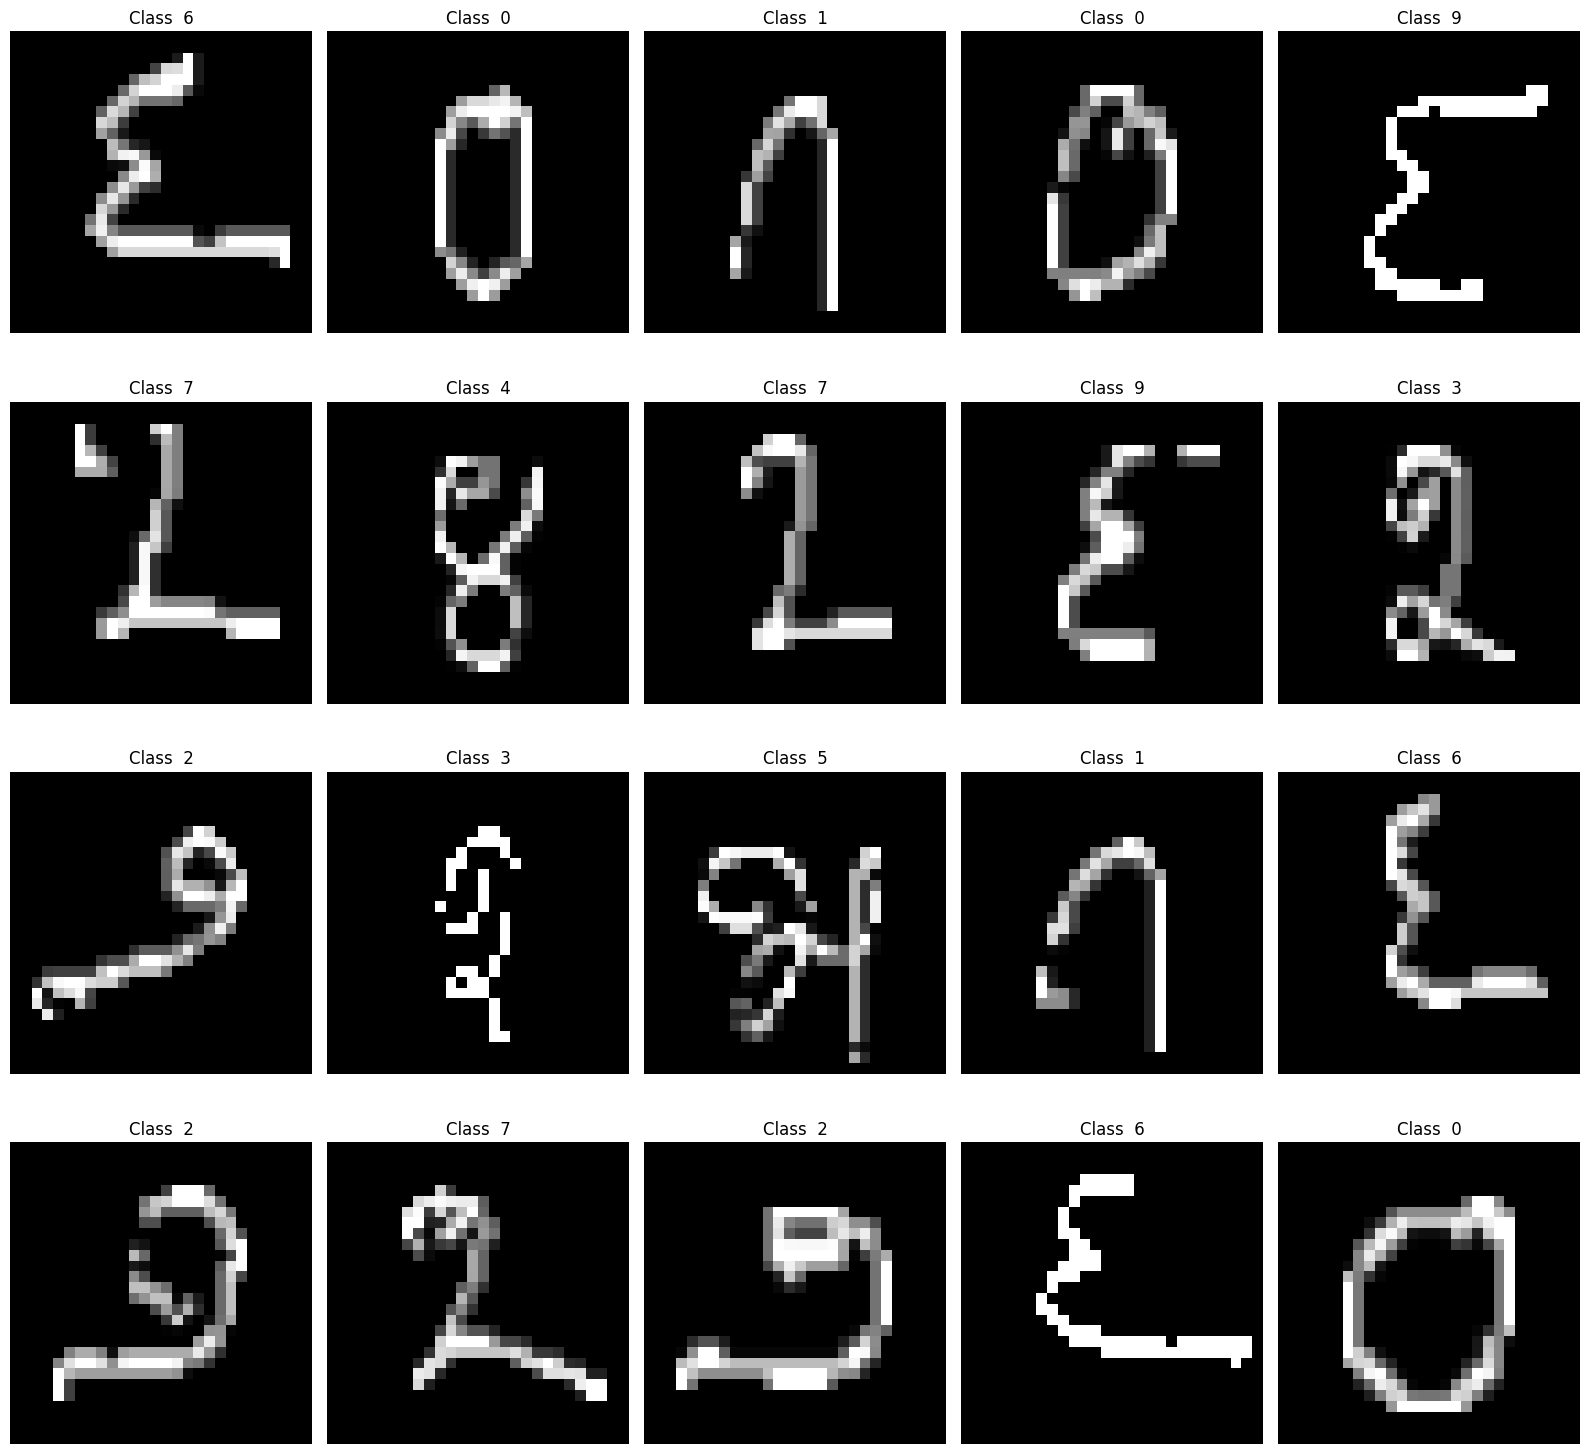

In [6]:
#Visual representation of classes with corresponding images
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,20):
    plt.subplot(4,5,j)
    j=j+1
    plt.imshow(X.iloc[i, :].values.reshape(28, 28),cmap="gray") #Converting it into  28x28 image
    plt.axis("off")
    plt.title(f"Class  {y.iloc[i]}")
    plt.tight_layout()
plt.show()    

In [4]:
component_size=[30,25,20,15,10]
#Models with accuracy for different component size
accuracy_list_dt=[]
accuracy_list_rf=[]
accuracy_list_nb=[]
accuracy_list_knn=[]
accuracy_list_svc=[]
accuracy_list=[accuracy_list_dt,accuracy_list_rf,accuracy_list_nb,accuracy_list_knn,accuracy_list_svc]
# accuracy_list=[accuracy_list_dt,accuracy_list_knn]

In [5]:
#ROC_AUC Curve
roc_auc_dt=[]
roc_auc_rf=[]
roc_auc_nb=[]
roc_auc_knn=[]
roc_auc_svc=[]
roc_auc_list=[roc_auc_dt,roc_auc_rf,roc_auc_nb,roc_auc_knn,roc_auc_svc]
# roc_auc_list=[roc_auc_dt,roc_auc_knn]
def prediction_probability(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)
    return y_pred_prob

In [6]:
#Principle Component Analysis(PCA)for Dimensionality Reduction

#Function of PCA
def pca(n_comp,X_train,X_test):
    pca_model=PCA(n_components=n_comp)
    pca_model.fit(X_train)
    X_train=pca_model.fit_transform(X_train)
    X_test=pca_model.fit_transform(X_test)
    return X_train,X_test
# component_size=[30,25,20]
component_size=[30,25,20,15,10] #list of component size

for component in component_size:
      X_train,X_test=pca(int(component),X_train,X_test)

      #Function to fit model and Evaluate the model using evaluation metrics
      def evaluation_metrics(model, X_train, y_train, X_test, y_test):
            #Fitting with the model
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            #Evaluation metrics
            accuracy         =     accuracy_score(y_test, y_pred)
            recall           =     recall_score(y_test, y_pred,average='macro')
            precision        =     precision_score(y_test, y_pred,average='macro')
            f1               =     f1_score(y_test, y_pred,average='macro')
            conf_matrix      =     confusion_matrix(y_test,y_pred)
            roc_auc          =     roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')
           
            return accuracy,precision,f1,recall,conf_matrix, roc_auc
      
      print("-------------------------------------------------------------------------------------------------------------------------------------------------------------")
      print(f"                                                             COMPONENT SIZE={component}                                                                     ")
      print("-------------------------------------------------------------------------------------------------------------------------------------------------------------")

      #Decision Tree Classifier--------------------------------------------------------------------------------------------------------------------------------------

      dt_accuracy,dt_precision,dt_f1_score,dt_recall,dt_confusion_matrix,dt_roc_auc =  evaluation_metrics(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)
      print()
      print("----------DECISION TREE CLASSIFIER----------")
      print()   
      print("Decision Tree Accuracy:", dt_accuracy),accuracy_list_dt.append(round(dt_accuracy,4))
      print("Decision Tree Precision:", dt_precision)
      print("Decision Tree F1-score:", dt_f1_score)
      print("Decision Tree Recall:", dt_recall)
      print("Decision Tree ROC-AUC:", dt_roc_auc),roc_auc_dt.append(dt_roc_auc)
      print("Decision Tree Confusion Matrix:")
      print(dt_confusion_matrix)

      #Random Forest Classifier--------------------------------------------------------------------------------------------------------------------------------------

      rf_accuracy,rf_precision,rf_f1_score, rf_recall, rf_confusion_matrix,rf_roc_auc=evaluation_metrics(RandomForestClassifier(), X_train, y_train, X_test, y_test)
      print()
      print("----------RANDOM FOREST CLASSIFIER----------")
      print()  
      print("Random Forest Accuracy:", rf_accuracy),accuracy_list_rf.append(round(rf_accuracy,4))
      print("Random Forest Precision:", rf_precision)
      print("Random Forest F1-score:", rf_f1_score)
      print("Random Forest Recall:", rf_recall)
      print("Random Forest ROC-AUC:", rf_roc_auc),roc_auc_rf.append(rf_roc_auc)
      print("Random Forest Confusion Matrix:")
      print(rf_confusion_matrix)

      # #Naive bayes Classifier--------------------------------------------------------------------------------------------------------------------------------------

      nb_accuracy,nb_precision,nb_f1_score, nb_recall,nb_confusion_matrix, nb_roc_auc =evaluation_metrics(GaussianNB(), X_train, y_train, X_test, y_test)
      print()
      print("----------NAIVE BAYES CLASSIFIER----------")
      print()  
      print("Naive Bayes Accuracy:", nb_accuracy),accuracy_list_nb.append(round(nb_accuracy,4))
      print("Random Forest Precision:", nb_precision)
      print("Naive Bayes F1-score:", nb_f1_score)
      print("Naive Bayes Recall:", nb_recall)
      print("Naive Bayes ROC-AUC:", nb_roc_auc),roc_auc_nb.append(nb_roc_auc)
      print("Naive Bayes Confusion Matrix:")
      print(nb_confusion_matrix)

      # #KNeighborsClassifier--------------------------------------------------------------------------------------------------------------------------------------

      knn_accuracy,knn_precision,knn_f1_score, knn_recall, knn_confusion_matrix ,knn_roc_auc =evaluation_metrics(KNeighborsClassifier(n_neighbors=8), X_train, y_train, X_test, y_test)
      print()
      print("----------K NEIGHBORS CLASSIFIER----------")
      print() 
      print("KNN Accuracy:", knn_accuracy),accuracy_list_knn.append(round(knn_accuracy,4))
      print("KNN Precision:", knn_precision)
      print("KNN F1-score:", knn_f1_score)
      print("KNN Recall:", knn_recall)
      print("KNN ROC-AUC:", knn_roc_auc),roc_auc_knn.append(knn_roc_auc)
      print("KNN Confusion Matrix:")
      print(knn_confusion_matrix)

      # #Support Vector Classifier (SVC)--------------------------------------------------------------------------------------------------------------------------------------

      svc_accuracy,svc_precision,svc_f1_score, svc_recall, svc_confusion_matrix, svc_roc_auc=evaluation_metrics(SVC(kernel="rbf",C=1.0,probability=True), X_train, y_train, X_test, y_test)
      print()
      print("----------SUPPORT VECTOR CLASSIFIER----------")
      print() 
      print("SVC Accuracy:", svc_accuracy),accuracy_list_svc.append(round(svc_accuracy,4))
      print("SVC F1-score:", svc_f1_score)
      print("SVC Recall:", svc_recall)
      print("SVC ROC-AUC:", svc_roc_auc),roc_auc_svc.append(svc_roc_auc)
      print("SVC confusion Matrix :")
      print(svc_confusion_matrix)


-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                             COMPONENT SIZE=30                                                                     
-------------------------------------------------------------------------------------------------------------------------------------------------------------

----------DECISION TREE CLASSIFIER----------

Decision Tree Accuracy: 0.326
Decision Tree Precision: 0.32671497617056167
Decision Tree F1-score: 0.3217082306554715
Decision Tree Recall: 0.32684801557833554
Decision Tree ROC-AUC: 0.6259888157612011
Decision Tree Confusion Matrix:
[[155  47 100 154   7   1 253 230  15  65]
 [ 82 186  40 321  17  14 150 150  40  31]
 [167  24 637  35   2  32   7  15  36  12]
 [ 58  80  59  93 110 234   4 101 140 127]
 [  2   2   1  30 838  57  17  11  23  34]
 [  5   3  16  91  46 776  15  19  20   

-------------------------------------------------------------ACCURACY GRAPH-------------------------------------------------------------
[0.326, 0.3133, 0.3115, 0.3195, 0.3261]


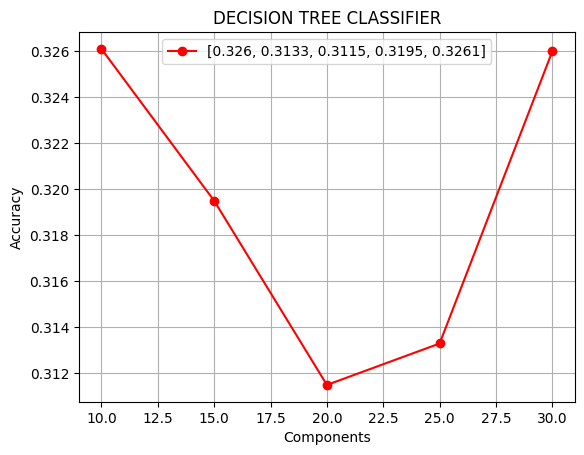

[0.4263, 0.4413, 0.4279, 0.4319, 0.4226]


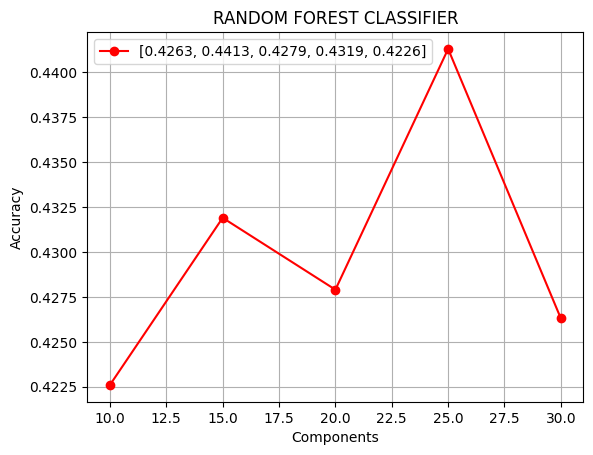

[0.4745, 0.4728, 0.4732, 0.4717, 0.4496]


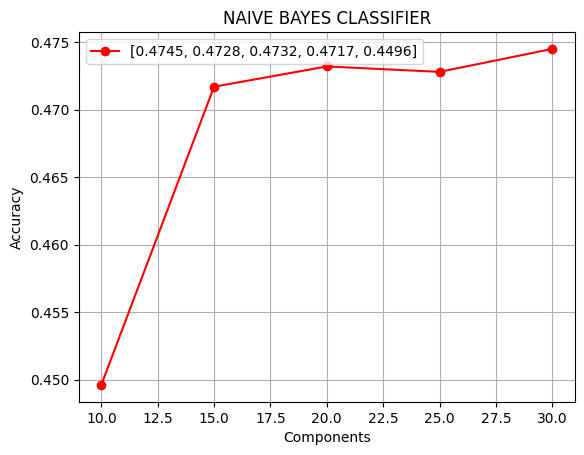

[0.4158, 0.4201, 0.4221, 0.4475, 0.4624]


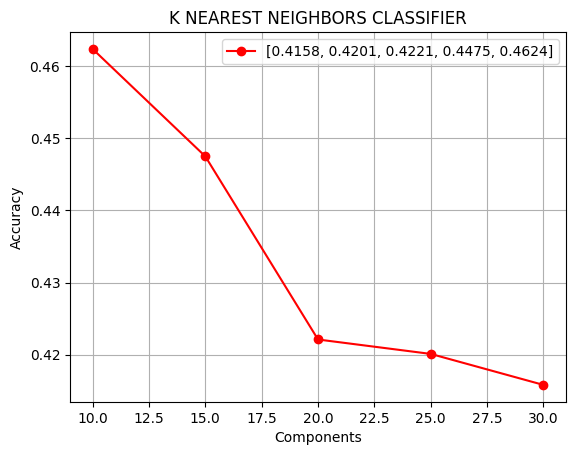

[0.4084, 0.412, 0.4217, 0.4282, 0.4419]


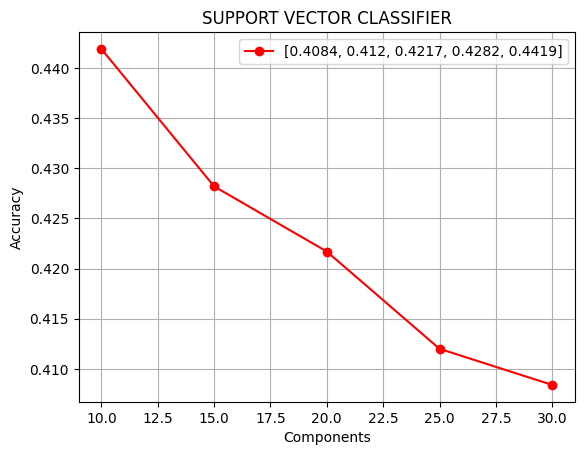

In [7]:
#Accuracy Graph of Models

print("-------------------------------------------------------------ACCURACY GRAPH-------------------------------------------------------------")
# model_list=["DECISION TREE CLASSIFIER","RANDOM FOREST CLASSIFIER"]
model_list=["DECISION TREE CLASSIFIER","RANDOM FOREST CLASSIFIER","NAIVE BAYES CLASSIFIER","K NEAREST NEIGHBORS CLASSIFIER","SUPPORT VECTOR CLASSIFIER"]
for model in  model_list:
    accuracy=accuracy_list[model_list.index(model)]
    print(accuracy)
    plt.plot(component_size,accuracy,label=accuracy,color='red', marker='o')
    plt.title(model)
    plt.xlabel("Components")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

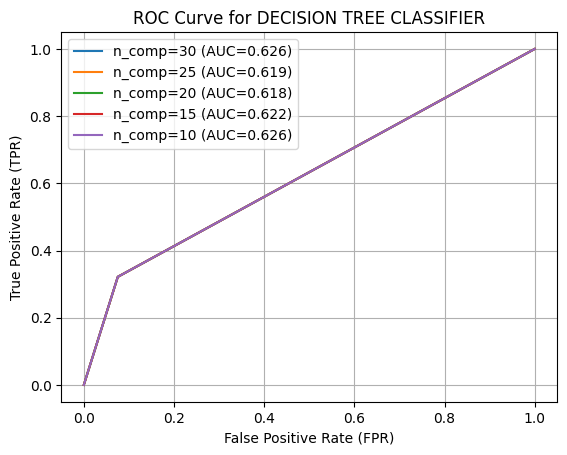

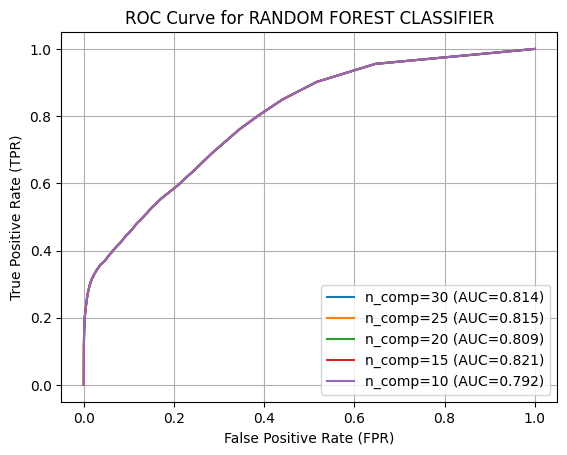

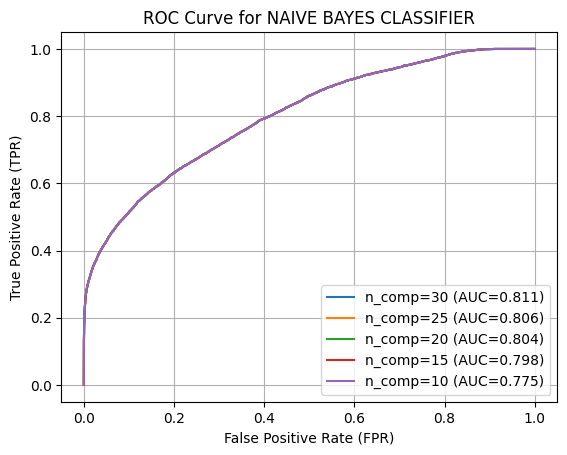

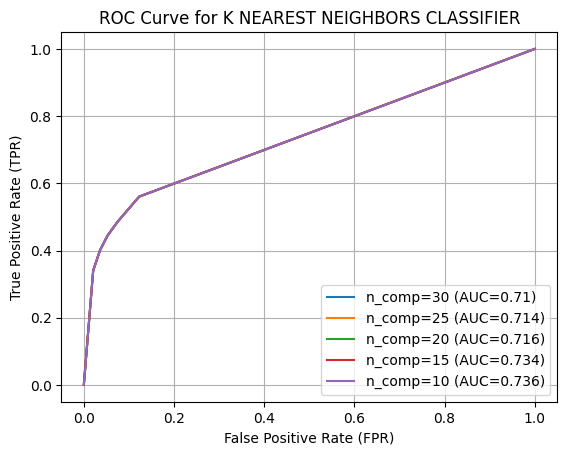

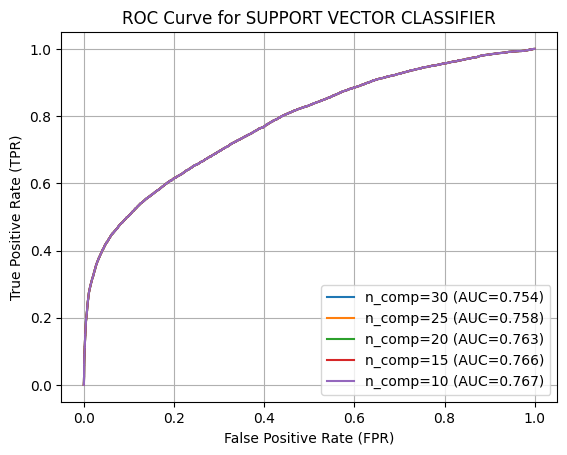

In [9]:
#ROC Curve for different Models with different Component size
# roc_auc_list=[roc_auc_dt,roc_auc_rf]
#model_list=[DecisionTreeClassifier(),KNeighborsClassifier()]
model_list=[DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier(),SVC(probability=True)]
model_name_list=["DECISION TREE CLASSIFIER","RANDOM FOREST CLASSIFIER","NAIVE BAYES CLASSIFIER","K NEAREST NEIGHBORS CLASSIFIER","SUPPORT VECTOR CLASSIFIER"]
m_index=0 
for model in model_list:    
     y_test_bin = label_binarize(y_test, classes=range(10))
     fpr, tpr, _ = roc_curve(y_test_bin.ravel(), prediction_probability(model).ravel())
     auc_value= auc(fpr,tpr)
     ra_index=0 
     for component in component_size: 
                plt.plot(  fpr,tpr,label="n_comp={} (AUC={})".format((component),(round(roc_auc_list[m_index][ra_index],3)))   )
                ra_index+=1
     plt.xlabel('False Positive Rate (FPR)')
     plt.ylabel('True Positive Rate (TPR)')
     plt.title(f'ROC Curve for {model_name_list[m_index]}')
     plt.legend()
     plt.grid(True)
     plt.show()
     m_index+=1